In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
!pip install quandl
import quandl

In [75]:
# prompt: take data of nse of tataglobAL using quandl library

df = quandl.get("NSE/TATAGLOBAL")


In [76]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


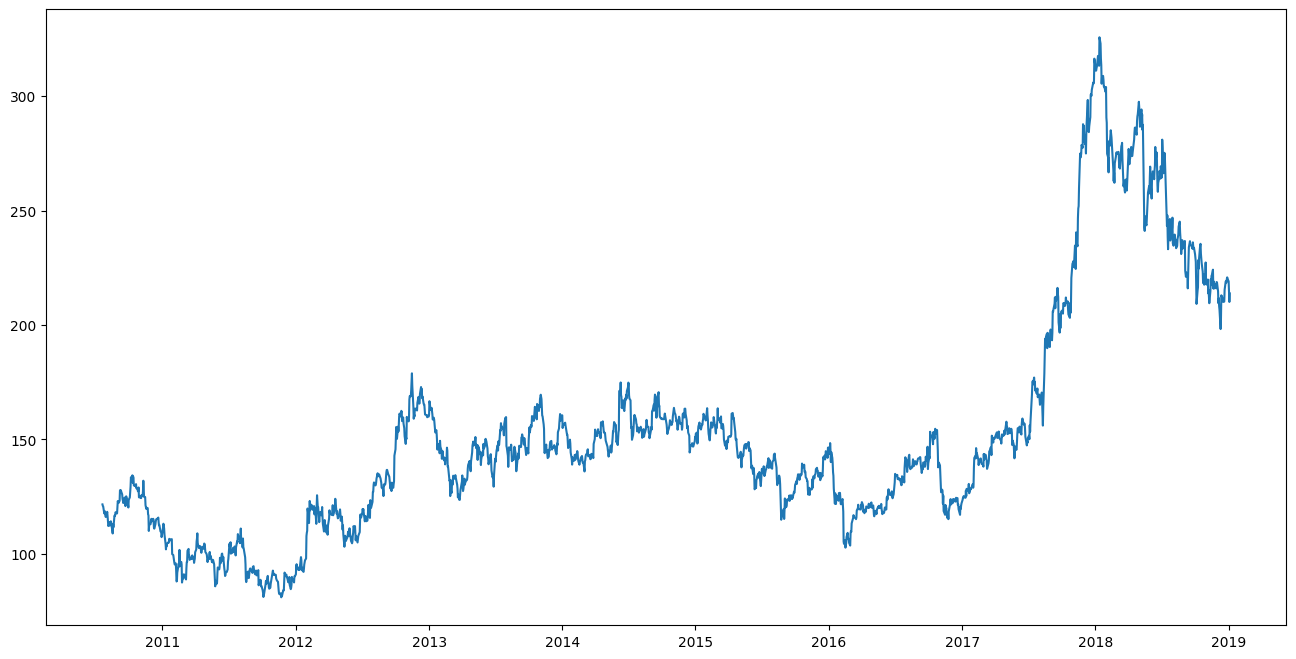

In [77]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])

In [78]:
df['Open-Close']=df['Open']-df['Close']
df['High-Low']=df['High']-df['Low']
df=df.dropna()

In [79]:
x=df[['Open-Close','High-Low']]
x.head()

,Open-Close,High-Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [80]:
Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [81]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [95]:
# prompt: from sklearn import train test spliy and install also

!pip install scikit-learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.25,random_state=44)


In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [ 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15],
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

#accuracy test
accuracy_train=accuracy_score(y_train,grid_search.predict(X_train))
accuracy_test=accuracy_score(y_test,grid_search.predict(X_test))

print(accuracy_train)
print(accuracy_test)


0.6755555555555556
0.5066666666666667


In [97]:
prediction_class=grid_search.predict(X_test)

In [98]:
actual_predicted_data=pd.DataFrame({'Actual':y_test,'Predicted':prediction_class})

In [99]:
actual_predicted_data.head(10)

,Actual,Predicted
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,-1
6,-1,1
7,-1,-1
8,-1,1
9,1,-1


In [100]:
y=df['Close']

In [101]:
y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

In [104]:
from sklearn.neighbors import KNeighborsRegressor
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state=44)


param_grid = {
    'n_neighbors': [ 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15],
}

knn_regressor = KNeighborsRegressor()

# Fit the KNeighborsRegressor to the training data

# Define the grid search object
grid_reg = GridSearchCV(knn_regressor, param_grid, cv=5)
grid_reg.fit(X_train_reg, y_train_reg)
prediction=grid_reg.predict(X_test_reg)

In [105]:
print(prediction)

[111.27       142.19       138.59666667 150.4        186.53
 135.12333333 151.13666667 141.71333333 118.66333333 144.59333333
 160.44333333 140.72       156.5        207.73666667 132.97
 207.62       111.35333333 134.16       132.28666667 138.60666667
 161.86666667 131.26       121.99333333 135.12333333 164.45666667
 216.39       135.43666667 137.07       162.64       128.51
 141.51333333 129.99666667 152.64666667 134.33333333 196.32333333
 120.84333333 156.49333333 157.4        145.47       132.08333333
 122.75666667 128.77       130.84333333 159.17666667 167.54666667
 168.98       189.31333333 184.33       187.08333333 130.23666667
 141.33333333 136.24       130.08       162.26333333 152.51333333
 124.14       134.20333333 139.87666667 113.61666667 137.07
 136.69       120.16666667 205.71333333 122.48333333 141.50666667
 136.37666667 114.93       132.82666667 181.68       125.15666667
 136.37666667 211.39333333 174.05333333 162.33333333 131.89666667
 131.15666667 124.06       134.61 

In [106]:
rms=np.sqrt(np.mean((np.array(y_test)-np.array(prediction))**2))
rms

150.68555384918616

In [107]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close': prediction})

In [108]:
valid.head(10)

,Actual Close,Predicted Close
Date,,
2015-03-17,156.70,111.270000
2015-09-07,120.45,142.190000
2013-02-18,141.90,138.596667
2013-07-05,145.15,150.400000
2018-03-15,279.60,186.530000
2017-01-19,130.50,135.123333
2013-11-26,145.50,151.136667
2012-12-17,165.65,141.713333
2016-07-11,133.10,118.663333


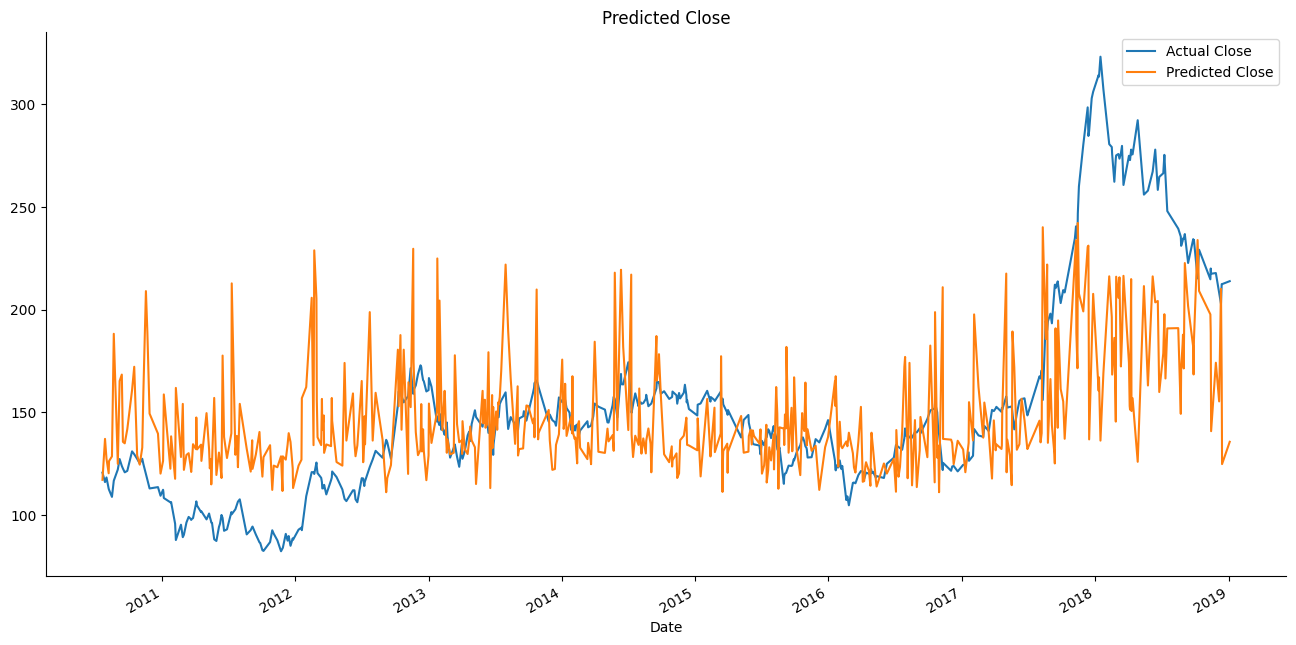

In [109]:
from matplotlib import pyplot as plt
valid['Actual Close'].plot(kind='line', figsize=(16, 8), title='Actual Close')
valid['Predicted Close'].plot(kind='line', figsize=(16, 8), title='Predicted Close')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
